<center><h1>Capstone Project Creation</h1></center>
<center><h3>IBM SkillsBuild Europe Delivery - Data Analytics</h3></center>


# Pre-requisite

* Understanding of Python, Power BI or Tableau
* Understanding of Data Cleaning 
* Understanding Data Visualization

#### Level of Exercise: Intermediate

#### Duration: approximately 3 hours

#### All exercises are required for a successful completion of this project

Please return this file with the answers in it to englishtrainer@skillup.online on or before the 22nd of December 2022.

### Data Analytics of Airbnb Data:

#### Objective:

In this exericise, you will be performing Data Analytics on an Open Dataset dataset coming from Airbnb. Some of the tasks include
- Data Cleaning.
- Data Transformation
- Data Visualization.

#### Overview of Airbnb Data:

People's main criteria when visiting new places are reasonable accommodation and food. Airbnb (Air-Bed-Breakfast) is an online marketplace created to meet this need of people by renting out their homes for a short term. They offer this facility at a relatively lower price than hotels. Further people worldwide prefer the homely and economical service offered by them. They offer services across various geographical locations

#### Dataset Source

YOu can get the dataset for this assessment using the following link: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata

This dataset contains information such as the neighborhood offering these services, room type, price,avaliabilty, reviews, service fee, cancellation policy and rules to use the house. This analysis will help airbnb in improving its services.  

So all the best for your Data Analytics Journey on Airbnb data!!!

## Task 1: Data Loading (Python)

1. Read the csv file and load it into a pandas dataframe.
2. Display the first five rows of your dataframe.
3. Display the data types of the columns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.getcwd()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
## Read the csv file
data = pd.read_csv('Airbnb_Open_Data.csv')

In [3]:
## Display the first 5 rows
data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
## Display the data types
data.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

## Task 2a: Data Cleaning (Any Tool)

1. Drop some of the unwanted columns. These include `host id`, `id`, `country` and `country code` from the dataset. 
2. State the reason for not including these columns for your Data Analytics.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots before and after the elimination of the columns.

In [5]:
# Dropping the columns host id, id, country, country code from the data
data = data.drop(['host id', 'id', 'country', 'country code','license'], 1)

In order to maintain the privacy of the hosts I chose to drop both the host id and id columns and dropped the country and country code as there is only one country that we are trying to analysing the data. Dropped the license column as it contains no values in it which is not required for the analysis purpose.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   NAME                            102349 non-null  object 
 1   host_identity_verified          102310 non-null  object 
 2   host name                       102193 non-null  object 
 3   neighbourhood group             102570 non-null  object 
 4   neighbourhood                   102583 non-null  object 
 5   lat                             102591 non-null  float64
 6   long                            102591 non-null  float64
 7   instant_bookable                102494 non-null  object 
 8   cancellation_policy             102523 non-null  object 
 9   room type                       102599 non-null  object 
 10  Construction year               102385 non-null  float64
 11  price                           102352 non-null  object 
 12  service fee     

## Task 2b: Data Cleaning (Python)

- Check for missing values in the dataframe and display the count in ascending order. **If the values are missing, impute the values as per the datatype of the columns.**
- Check whether there are any duplicate values in the dataframe and, if present, remove them.
- Display the total number of records in the dataframe before and after removing the duplicates.

In [7]:
## Check for missing values in the dataframe and display the count in ascending order.
data.isna().sum().sort_values()

room type                             0
lat                                   8
long                                  8
neighbourhood                        16
neighbourhood group                  29
cancellation_policy                  76
instant_bookable                    105
number of reviews                   183
Construction year                   214
price                               247
NAME                                250
service fee                         273
host_identity_verified              289
calculated host listings count      319
review rate number                  326
host name                           406
minimum nights                      409
availability 365                    448
reviews per month                 15879
last review                       15893
house_rules                       52131
dtype: int64

In [8]:
data.fillna({'reviews per month':0, 'house_rules': 'Unknown'}, inplace = True)

In [9]:
data['minimum nights'] = np.array(data['minimum nights'], dtype = np.int16)

In [10]:
data['number of reviews'] = np.array(data['number of reviews'], dtype = np.int16)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   NAME                            102349 non-null  object 
 1   host_identity_verified          102310 non-null  object 
 2   host name                       102193 non-null  object 
 3   neighbourhood group             102570 non-null  object 
 4   neighbourhood                   102583 non-null  object 
 5   lat                             102591 non-null  float64
 6   long                            102591 non-null  float64
 7   instant_bookable                102494 non-null  object 
 8   cancellation_policy             102523 non-null  object 
 9   room type                       102599 non-null  object 
 10  Construction year               102385 non-null  float64
 11  price                           102352 non-null  object 
 12  service fee     

In [12]:
## Check whether there are any duplicate values in the dataframe and if present remove them.
Duplicate_values = data.duplicated().sum()
Duplicate_values   #3436 duplicates were found
data.drop_duplicates(inplace = True)

In [13]:
## Display the total number of records in the dataframe after removing the duplicates.
len(data)  #99163 records were left after removing the duplicates

99163

## Task 3: Data Transformation (Any Tool)


- Rename the column `availability 365` to `days_booked`
- Convert all column names to lowercase and replace the spaces in the column names with an underscore "_".
- Remove the dollar sign and comma from the columns `price` and `service_fee`. If necessary, convert these two columns to the appropriate data type.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [14]:
## Rename the column.
data.rename(columns = {'availability 365':'days_booked'}, inplace = True)
data.columns

Index(['NAME', 'host_identity_verified', 'host name', 'neighbourhood group',
       'neighbourhood', 'lat', 'long', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year', 'price',
       'service fee', 'minimum nights', 'number of reviews', 'last review',
       'reviews per month', 'review rate number',
       'calculated host listings count', 'days_booked', 'house_rules'],
      dtype='object')

In [15]:
## Convert all column names to lowercase and replace the spaces with an underscore "_"
data.columns = [c.replace(" ", "_") for c in data]
data.columns = data.columns.str.lower()
data.head()

,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,...,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,days_booked,house_rules
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,...,$966,$193,10,9,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,...,$142,$28,30,45,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,...,$620,$124,3,0,NaN,0.00,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."
3,NaN,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,...,$368,$74,30,270,7/5/2019,4.64,4.0,1.0,322.0,Unknown
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,...,$204,$41,10,9,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."


In [16]:
## Remove the dollar sign and comma from the columns. If necessary, convert these two columns to the appropriate data type.
data.price = (data.price.str.replace('$','').str.replace(',','')).astype(float)
data.service_fee = (data.service_fee.str.replace('$','').str.replace(',','')).astype(float)
data

,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,...,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,days_booked,house_rules
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,...,966.0,193.0,10,9,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,...,142.0,28.0,30,45,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,...,620.0,124.0,3,0,NaN,0.00,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."
3,NaN,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,...,368.0,74.0,30,270,7/5/2019,4.64,4.0,1.0,322.0,Unknown
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,...,204.0,41.0,10,9,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,Cozy bright room near Prospect Park,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,True,moderate,Private room,...,696.0,NaN,7,12,3/27/2019,0.44,5.0,1.0,0.0,Shoes off Clean After yourself Turn Lights and...
102054,Private Bedroom with Amazing Rooftop View,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,False,flexible,Private room,...,909.0,NaN,1,19,8/31/2017,0.72,3.0,2.0,0.0,#NAME?
102055,Pretty Brooklyn One-Bedroom for 2 to 4 people,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,True,moderate,Entire home/apt,...,387.0,NaN,2,50,6/26/2019,3.12,4.0,2.0,235.0,* Check out: 10am * We made an effort to keep ...
102056,Room & private bathroom in historic Harlem,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,True,strict,Private room,...,848.0,NaN,2,0,NaN,0.00,1.0,1.0,0.0,Each of us is working and/or going to school a...


### Task 4: Exploratory Data Analysis (Any Tool)

- List the count of various room types avaliable in the dataset.
- Which room type has the most strict cancellation policy?
- List the average price per neighborhood group, and highlight the most expensive neighborhood to rent from.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [17]:
## List the count of various room types avaliable with Airbnb
#room_type = data.groupby('room_type').room_type.agg(['count'])
#room_type
data.room_type.value_counts()

Entire home/apt    52003
Private room       44895
Shared room         2150
Hotel room           115
Name: room_type, dtype: int64

In [48]:
## Which room type adheres to more strict cancellation policy
cancellation_policy = data[data['cancellation_policy']=='strict']
cancellation_policy

,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,...,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,days_booked,house_rules
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,...,966.0,193.0,10,9,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
8,Large Furnished Room Near B'way,verified,Evelyn,Manhattan,Hell's Kitchen,40.76489,-73.98493,True,strict,Private room,...,1018.0,204.0,2,430,6/24/2019,3.47,3.0,1.0,180.0,- Please clean up after yourself when using th...
9,Cozy Clean Guest Room - Family Apt,unconfirmed,Carl,Manhattan,Upper West Side,40.80178,-73.96723,False,strict,Private room,...,291.0,58.0,2,118,7/21/2017,0.99,5.0,1.0,375.0,NO SMOKING OR PETS ANYWHERE ON THE PROPERTY 1....
12,Central Manhattan/near Broadway,verified,NaN,Manhattan,Hell's Kitchen,40.76076,-73.98867,False,strict,Private room,...,714.0,143.0,2,188,6/23/2019,1.50,4.0,1.0,258.0,- One of the bedroom closets is not accessible...
24,CBG Helps Haiti Rm #2,unconfirmed,Charlotte,Brooklyn,Park Slope,40.68001,-73.97865,NaN,strict,Private room,...,816.0,163.0,2,71,7/2/2019,0.61,4.0,6.0,344.0,We take great care of our home and expect you ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102037,Bx Apartment,unconfirmed,Vii,Bronx,Olinville,40.88438,-73.86397,True,strict,Private room,...,531.0,NaN,1,0,NaN,0.00,3.0,1.0,0.0,#NAME?
102040,"Room in Queens, NY, near LGA.",verified,Sonia,Queens,East Elmhurst,40.76245,-73.87938,True,strict,Private room,...,982.0,196.0,1,239,6/29/2019,8.58,2.0,2.0,361.0,1. Please clean-up after yourself in the kitch...
102042,Central Park Views - Private Room & Bathroom,verified,NaN,Manhattan,Upper West Side,40.79712,-73.96117,False,strict,Private room,...,706.0,141.0,1,4,8/15/2017,0.14,4.0,1.0,0.0,My roommates and I take a lot of pride in keep...
102049,MASTER Cozy Bedroom Queen size 2 blocks Timesq...,verified,NaN,Manhattan,Hell's Kitchen,40.76125,-73.98945,True,strict,Entire home/apt,...,NaN,NaN,1,81,3/5/2019,2.96,2.0,2.0,0.0,- I work at home and prefer to rent to folks w...


In [36]:
## List the prices by neighborhood group and also mention which is the most expensive neighborhood group for rentals
expensive_neighbourhood_group = data.price.groupby (data.neighbourhood_group).mean().sort_values(ascending = False)
expensive_neighbourhood_group

neighbourhood_group
Queens           629.712735
Bronx            626.614412
Staten Island    626.431843
Brooklyn         626.428192
Manhattan        622.683781
brookln          580.000000
manhatan         460.000000
Name: price, dtype: float64

## Task 5a: Data Visualization (Any Tool)

- Create a horizontal bar chart to display the top 10 most expensive neighborhoods in the dataset.
    - Create another chart with the 10 cheapest neighborhoods in the dataset.
- Create a box and whisker chart that showcases the price distribution of all listings split by room type.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

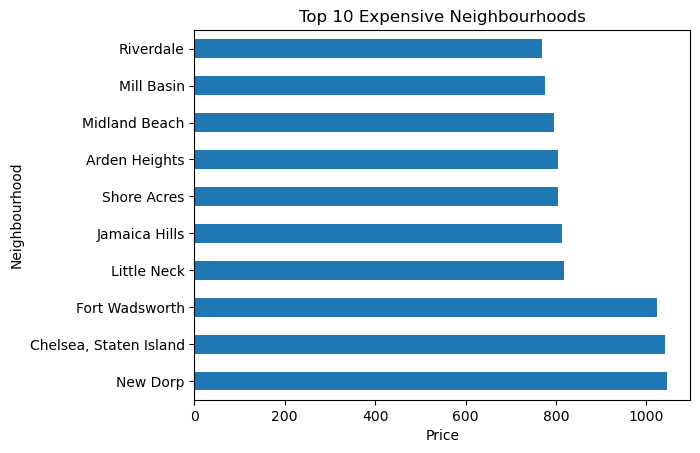

In [20]:
#Bar chart showing the top 10 most expensive neighbourhoods
expensive_neighbourhood = data.price.groupby (data.neighbourhood).mean().sort_values(ascending = False)
expensive_neighbourhood.head(10)
expensive_neighbourhood.head(10).plot(kind = 'barh')
plt.xlabel('Price')
plt.ylabel('Neighbourhood')
plt.title('Top 10 Expensive Neighbourhoods')
plt.show()

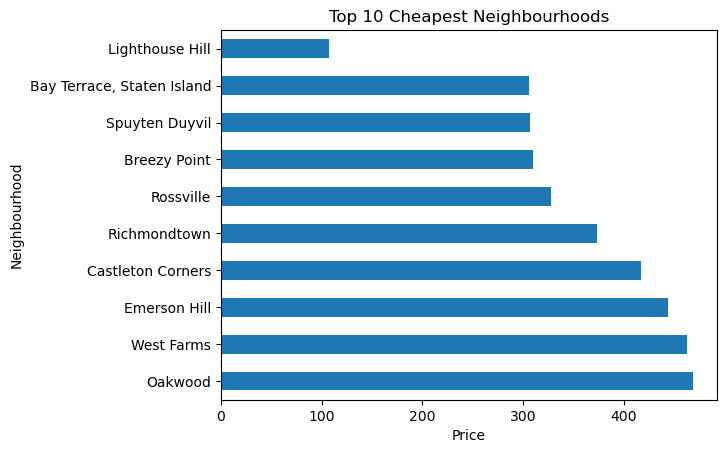

In [21]:
#Horizontal bar chart showing the top 10 cheapest neighbourhoods
cheapest_neighbourhood = data.price.groupby (data.neighbourhood).mean().sort_values(ascending = False)
cheapest_neighbourhood.tail(10)
expensive_neighbourhood.tail(10).plot(kind = 'barh')
plt.xlabel('Price')
plt.ylabel('Neighbourhood')
plt.title('Top 10 Cheapest Neighbourhoods')
plt.show()

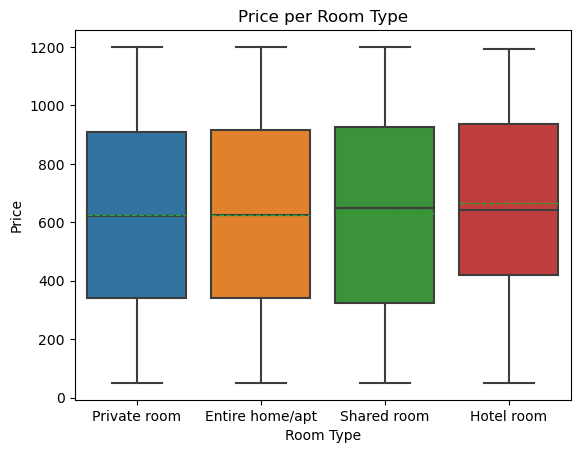

In [22]:
#Box plot showing the average price based on room type
A1 = sns.boxplot(data = data, x = 'room_type', y = 'price',\
                 showmeans = True,meanline =True)
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Price per Room Type')
plt.show()

## Task 5b: Data Visualization (Any Tool)

- Create a scatter plot to illustrate the relationshi between the cleaning fee and the room price and write down the kind of correlation, if any, that you see.
- Create a line chart to showcase the total amount of listings available per year.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

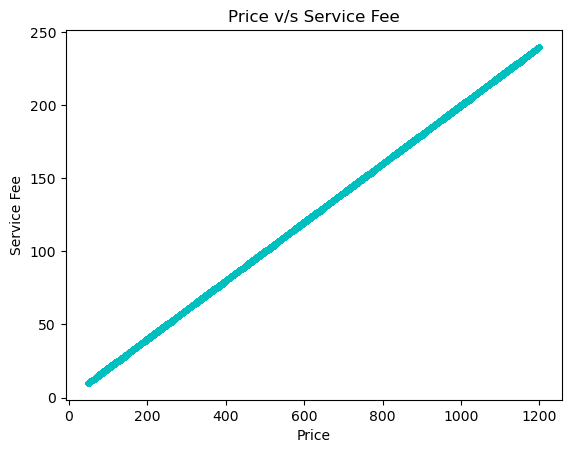

In [23]:
#A2 = sns.scatterplot(x='service_fee', y= 'price', data =data, color = 'r')
#There is postive correlation between the price and the service fee. 
#If there is an increase in price then there is a corresponding increase in the service fee as well.
plt.xlabel('Price')
plt.ylabel('Service Fee')
plt.title('Price v/s Service Fee')
plt.scatter(data['price'],data['service_fee'], c= 'c', marker ='.')
plt.show()

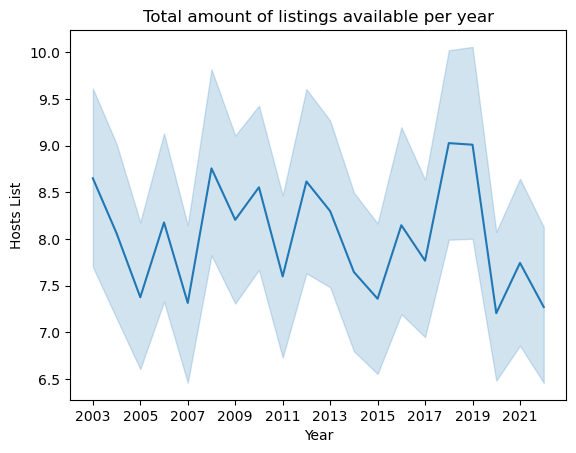

In [24]:
#A line chart showing the total amount of listings availabe per year
A3 = sns.lineplot(x= 'construction_year', y= 'calculated_host_listings_count',data = data)
plt.rcParams ['figure.figsize'] = [10,8]
plt.xticks(np.arange(2003, 2022, 2), fontsize = 10)
plt.xlabel('Year')
plt.ylabel('Hosts List')
plt.title('Total amount of listings available per year')
#plt.plot(data['construction_year'],data['calculated_host_listings_count'], 'g')
plt.show()

## Task 5c: Data Visualization (Any Tool)

- Create a data visualization of your choosing using one of the review columns in isolation or in combination with another column.
- Create a visualization to compare at least two different variables between super hosts and regular hosts.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

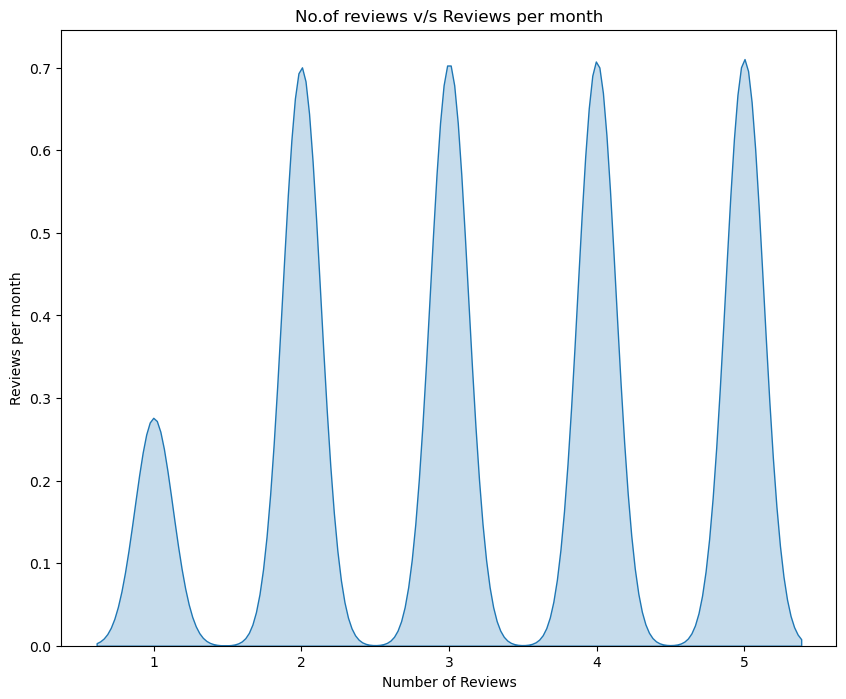

In [25]:
#Visualization showing the relationship between the no.of reviews and reviews per month
sns.kdeplot(data.review_rate_number, shade =True, shade_lowest = False, cmap = 'Reds')
plt.xlabel('Number of Reviews')
plt.ylabel('Reviews per month')
plt.title('No.of reviews v/s Reviews per month')

plt.show()

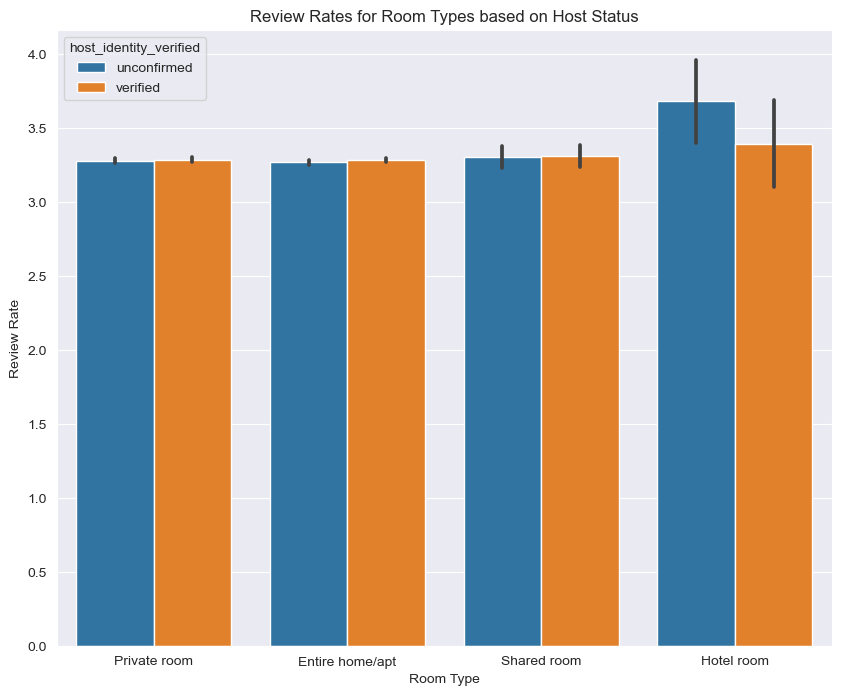

In [26]:
#Bar chart showing the review rate for different room types grouped by hosts status
sns.set_style('darkgrid')
host_identity_verified = data.host_identity_verified.value_counts()
sns.barplot(x = 'room_type', y= 'review_rate_number', hue = 'host_identity_verified', data = data)
plt.xlabel('Room Type')
plt.ylabel('Review Rate')
plt.title('Review Rates for Room Types based on Host Status')
plt.show()

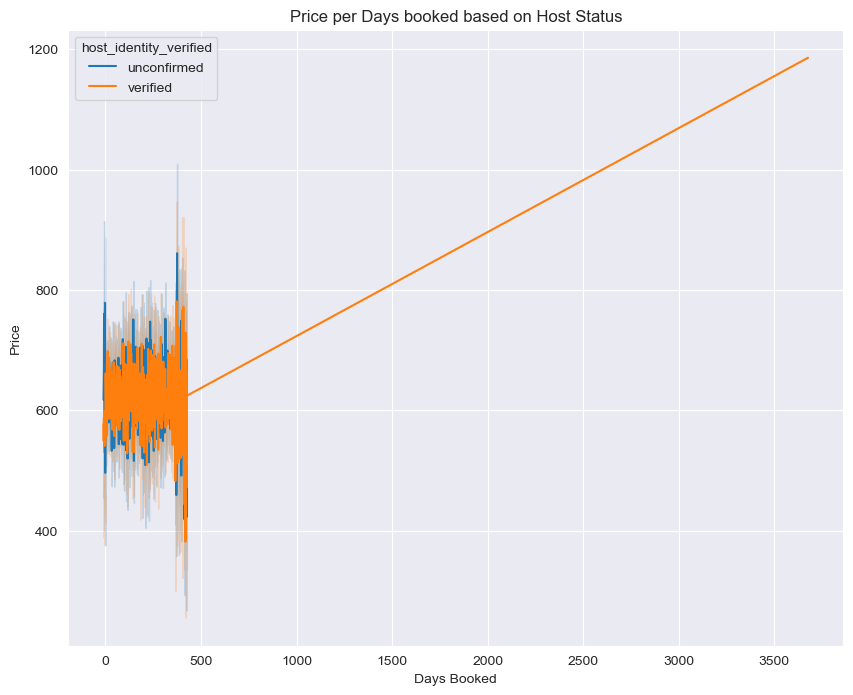

In [27]:
#A line chart showing the price and occupancy days based on the hosts types
host_identity_verified = data.host_identity_verified.value_counts()
sns.lineplot(data.days_booked, data.price, hue = data.host_identity_verified)
plt.xlabel('Days Booked')
plt.ylabel('Price')
plt.title('Price per Days booked based on Host Status')
plt.show()

In [28]:
host_identity_verified = data['host_identity_verified'].value_counts()
print(host_identity_verified)

unconfirmed    49492
verified       49382
Name: host_identity_verified, dtype: int64


In [29]:
print(host_identity_verified.index.values.tolist())
print(host_identity_verified.values.tolist())

['unconfirmed', 'verified']
[49492, 49382]


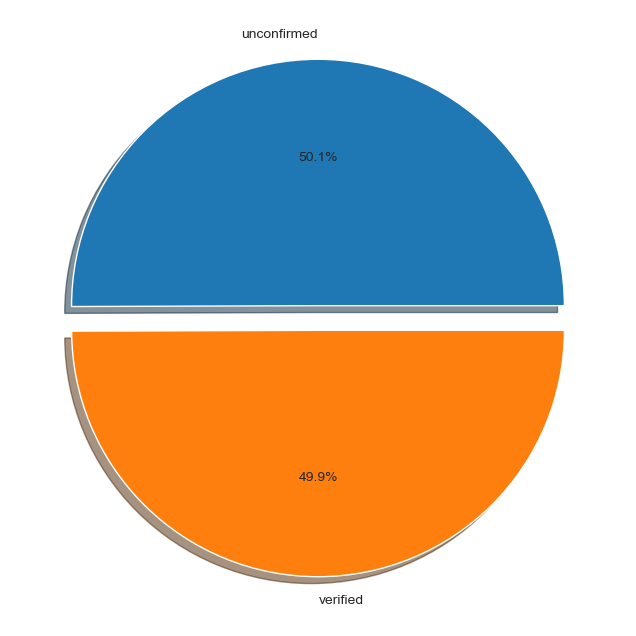

In [30]:
# Pie chart showing the verifies v/s unconfirmed hosts' percentage
labels = host_identity_verified.index.values.tolist()
values = host_identity_verified.values.tolist()
explode = 0.05, 0.05
plt.pie(values, explode = explode, labels = labels,\
       autopct = '%1.1f%%', shadow = True)
plt.show()

In [31]:
data.corr()

,lat,long,construction_year,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,days_booked
lat,1.000000,0.072778,0.006074,-0.005702,-0.005688,0.014527,-0.025471,-0.026119,-0.004773,0.032240,-0.005267
long,0.072778,1.000000,0.001444,0.002857,0.002699,-0.038930,0.067865,0.120471,0.014706,-0.104841,0.058817
construction_year,0.006074,0.001444,1.000000,-0.003793,-0.003460,-0.000539,0.001778,0.003460,0.005410,-0.002700,-0.007812
price,-0.005702,0.002857,-0.003793,1.000000,0.999991,-0.003140,0.004925,0.005164,-0.004314,0.000415,-0.002066
service_fee,-0.005688,0.002699,-0.003460,0.999991,1.000000,-0.003326,0.004820,0.005005,-0.004120,0.000564,-0.002414
minimum_nights,0.014527,-0.038930,-0.000539,-0.003140,-0.003326,1.000000,-0.048793,-0.091085,-0.001665,0.083320,0.061413
number_of_reviews,-0.025471,0.067865,0.001778,0.004925,0.004820,-0.048793,1.000000,0.612252,-0.018089,-0.080865,0.097978
reviews_per_month,-0.026119,0.120471,0.003460,0.005164,0.005005,-0.091085,0.612252,1.000000,0.033436,-0.039765,0.070592
review_rate_number,-0.004773,0.014706,0.005410,-0.004314,-0.004120,-0.001665,-0.018089,0.033436,1.000000,0.024234,-0.006824
calculated_host_listings_count,0.032240,-0.104841,-0.002700,0.000415,0.000564,0.083320,-0.080865,-0.039765,0.024234,1.000000,0.157832


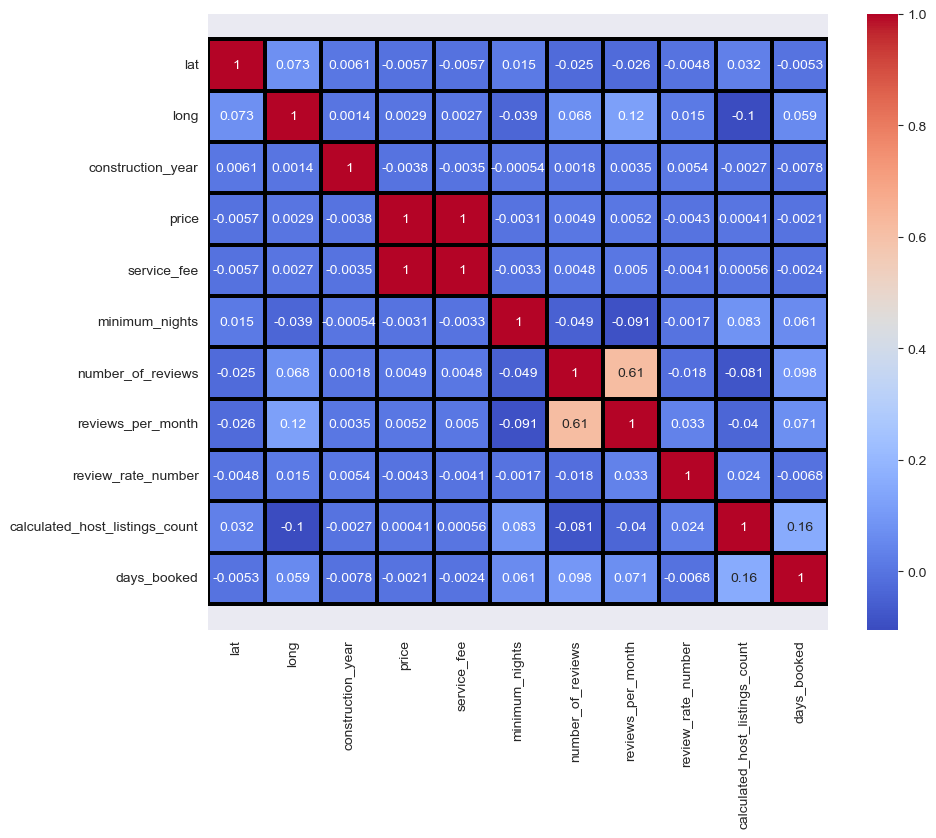

In [32]:
#Heat map showing the correlation between the columns of Airbnb dataset
corr_values = data.corr()
ax = sns.heatmap(corr_values, annot = True, cmap = 'coolwarm', linecolor = 'black', linewidth = 1.5)
bottom,top = ax.set_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()